<a href="https://colab.research.google.com/github/jbrenorv/ordenacao/blob/main/graficos/graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
np.random.seed(19680801)

# cinza = '#858585'
cinza = '#353535'

default_font_family = plt.rcParams['font.family']
default_font_size = plt.rcParams['font.size']
default_text_color = plt.rcParams['text.color']
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.monospace'] = ['Courier New', 'Consolas', 'DejaVu Sans Mono']
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = cinza

In [131]:
csv_url = 'https://raw.githubusercontent.com/jbrenorv/ordenacao/refs/heads/main/output/output_2025.07.19-19.39.11.csv'
df = pd.read_csv(csv_url)

In [132]:
inf_grupos = [[['Bolha'], ['Coquetel'], ['Selecao'], ['Insercao']]] * 3
# sup_grupos = [[['Shellsort'], ['Mergesort'], ['Heapsort'], ['Quicksort'], ['QuicksortI'], ['Introsort']]] * 3
sup_grupos = [[['Shellsort'], ['Mergesort'], ['Heapsort'], ['Quicksort']]] * 3
lin_grupos = [[['Contagem'], ['Balde'], ['RadixsortC'], ['RadixsortB']]] * 3

dado_label_map = {
    'comparacoes': 'Comparações',
    'movimentacoes': 'Movimentações',
    'tempo': 'Tempo em segundos'
}

tipo_label_map = {
    0: 'Crescente',
    1: 'Decrescente',
    2: 'Pseudoaleatório',
    3: 'M3K'
}

In [133]:
def setup_ax_colors(ax, title):
  ax.set_title(title)
  ax.tick_params(axis='x', colors=cinza)
  ax.tick_params(axis='y', colors=cinza)
  ax.spines['bottom'].set_color(cinza)
  ax.spines['top'].set_color(cinza)
  ax.spines['left'].set_color(cinza)
  ax.spines['right'].set_color(cinza)

In [134]:
linestyles = ['solid', 'dotted', 'dashed', 'dashdot']

def plot_xy(titulo, grupos, ydata):
  fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8, 3))
  # fig.suptitle(f'{titulo} ({dado_label_map[ydata]})')

  for tipo, algoritmos in enumerate(grupos):
    setup_ax_colors(axes[tipo], tipo_label_map[tipo])

    for i, algoritmo in enumerate(algoritmos):
      d = df[(df.algoritmo == algoritmo[0]) & (df.tipo == tipo)]
      medias = d.groupby('tamanho')[ydata].mean().reset_index()
      label = ", ".join(algoritmo)
      axes[tipo].plot(
          medias['tamanho'],
          medias[ydata],
          label=label,
          linestyle=linestyles[i],
          linewidth=1.0,
          color=cinza)

    axes[tipo].grid()
    axes[tipo].legend(loc='upper left')

  # fig.supxlabel('Tamanho do vetor')
  plt.tight_layout()
  plt.savefig(f'{titulo.split(" ")[1].lower()}.pdf')
  plt.show()

In [135]:
inf_reagrupados = inf_grupos.copy()
# inf_reagrupados[0] = [['Bolha', 'Coquetel', 'Inserção'], ['Seleção']]
# inf_reagrupados[1] = [['Bolha', 'Coquetel'], ['Seleção'], ['Inserção']]
# plot_xy(titulo='Métodos Inferiores', grupos=inf_reagrupados, ydata='tempo')

In [136]:
inf_reagrupados = inf_grupos.copy()
# inf_reagrupados[0] = [['Bolha', 'Coquetel', 'Inserção'], ['Seleção']]
# inf_reagrupados[1] = [['Bolha', 'Coquetel', 'Seleção', 'Inserção']]
# inf_reagrupados[2] = [['Bolha', 'Seleção'], ['Coquetel'], ['Inserção']]
# plot_xy(titulo='Métodos Inferiores', grupos=inf_reagrupados, ydata='comparacoes')

In [137]:
inf_reagrupados = inf_grupos.copy()
# inf_reagrupados[0] = [['Bolha', 'Coquetel', 'Seleção', 'Inserção']]
# inf_reagrupados[1] = [['Bolha', 'Coquetel'], ['Seleção'], ['Inserção']]
# inf_reagrupados[2] = [['Bolha', 'Coquetel'], ['Seleção'], ['Inserção']]
# plot_xy(titulo='Métodos Inferiores', grupos=inf_reagrupados, ydata='movimentacoes')

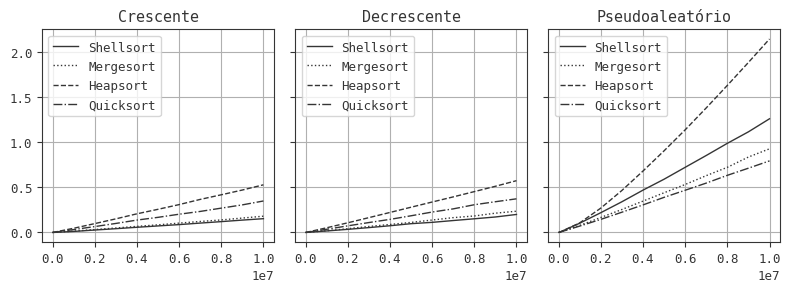

In [138]:
plot_xy(titulo='Métodos Superiores', grupos=sup_grupos, ydata='tempo')

In [139]:
# plot_xy(titulo='Métodos Superiores', grupos=sup_grupos, ydata='comparacoes')

In [140]:
# plot_xy(titulo='Métodos Superiores', grupos=sup_grupos, ydata='movimentacoes')

In [141]:
# plot_xy(titulo='Métodos Lineares', grupos=lin_grupos, ydata='tempo')

In [142]:
lin_reagrupados = lin_grupos.copy()
# lin_reagrupados[0] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
# lin_reagrupados[1] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
# lin_reagrupados[2] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
# plot_xy(titulo='Métodos Lineares', grupos=lin_reagrupados, ydata='comparacoes')

In [143]:
lin_reagrupados = lin_grupos.copy()
# lin_reagrupados[0] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
# lin_reagrupados[1] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
# lin_reagrupados[2] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
# plot_xy(titulo='Métodos Lineares', grupos=lin_reagrupados, ydata='movimentacoes')

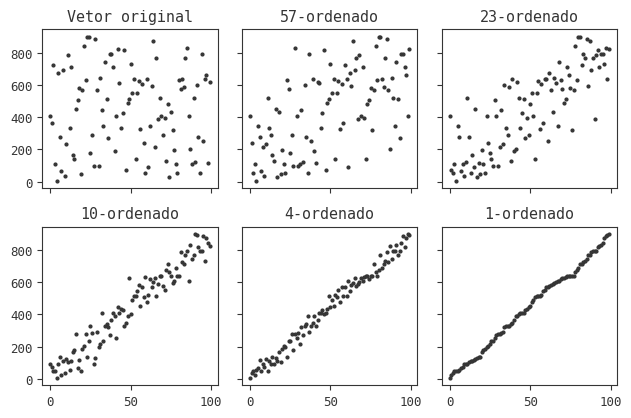

In [144]:
def h_ordena(n, h, v):
  for i in range(h, n):
    chave = v[i]
    j = i
    while j >= h and v[j - h] > chave:
      v[j] = v[j - h]
      j -= h
    v[j] = chave;

max_value = 900
n = 100
x = range(n)
y = np.random.randint(max_value, size=n)
ciura_seq = [57, 23, 10, 4, 1]

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(6.4, 4.26))
idx = lambda i: 0 if i < 3 else 1

setup_ax_colors(axes[0][0], 'Vetor original')
axes[0][0].plot(x, y, 'o', ms=2, color=cinza)

# shellsort
for i, h in enumerate(ciura_seq, 1):
  h_ordena(n, h, y)

  setup_ax_colors(axes[idx(i)][i % 3], f'{h}-ordenado')
  axes[idx(i)][i % 3].plot(x, y, 'o', ms=2, color=cinza)

plt.tight_layout()
plt.savefig('shellsort.pdf')
plt.show()